# データ分析

データを散布図行列にプロットする．

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
# 対象データの設定
DIRECTORIES = ["../windowed", "../windowed_boxcox"]
TIME_WINDOWS = [120, 180, 240]
BLE_IDS_NEW = [15070, 15158, 15159, 15160, 15161]
BLE_IDS_OLD = [15153, 15155, 15162, 15163, 15164]
N_SAMPLES = 15

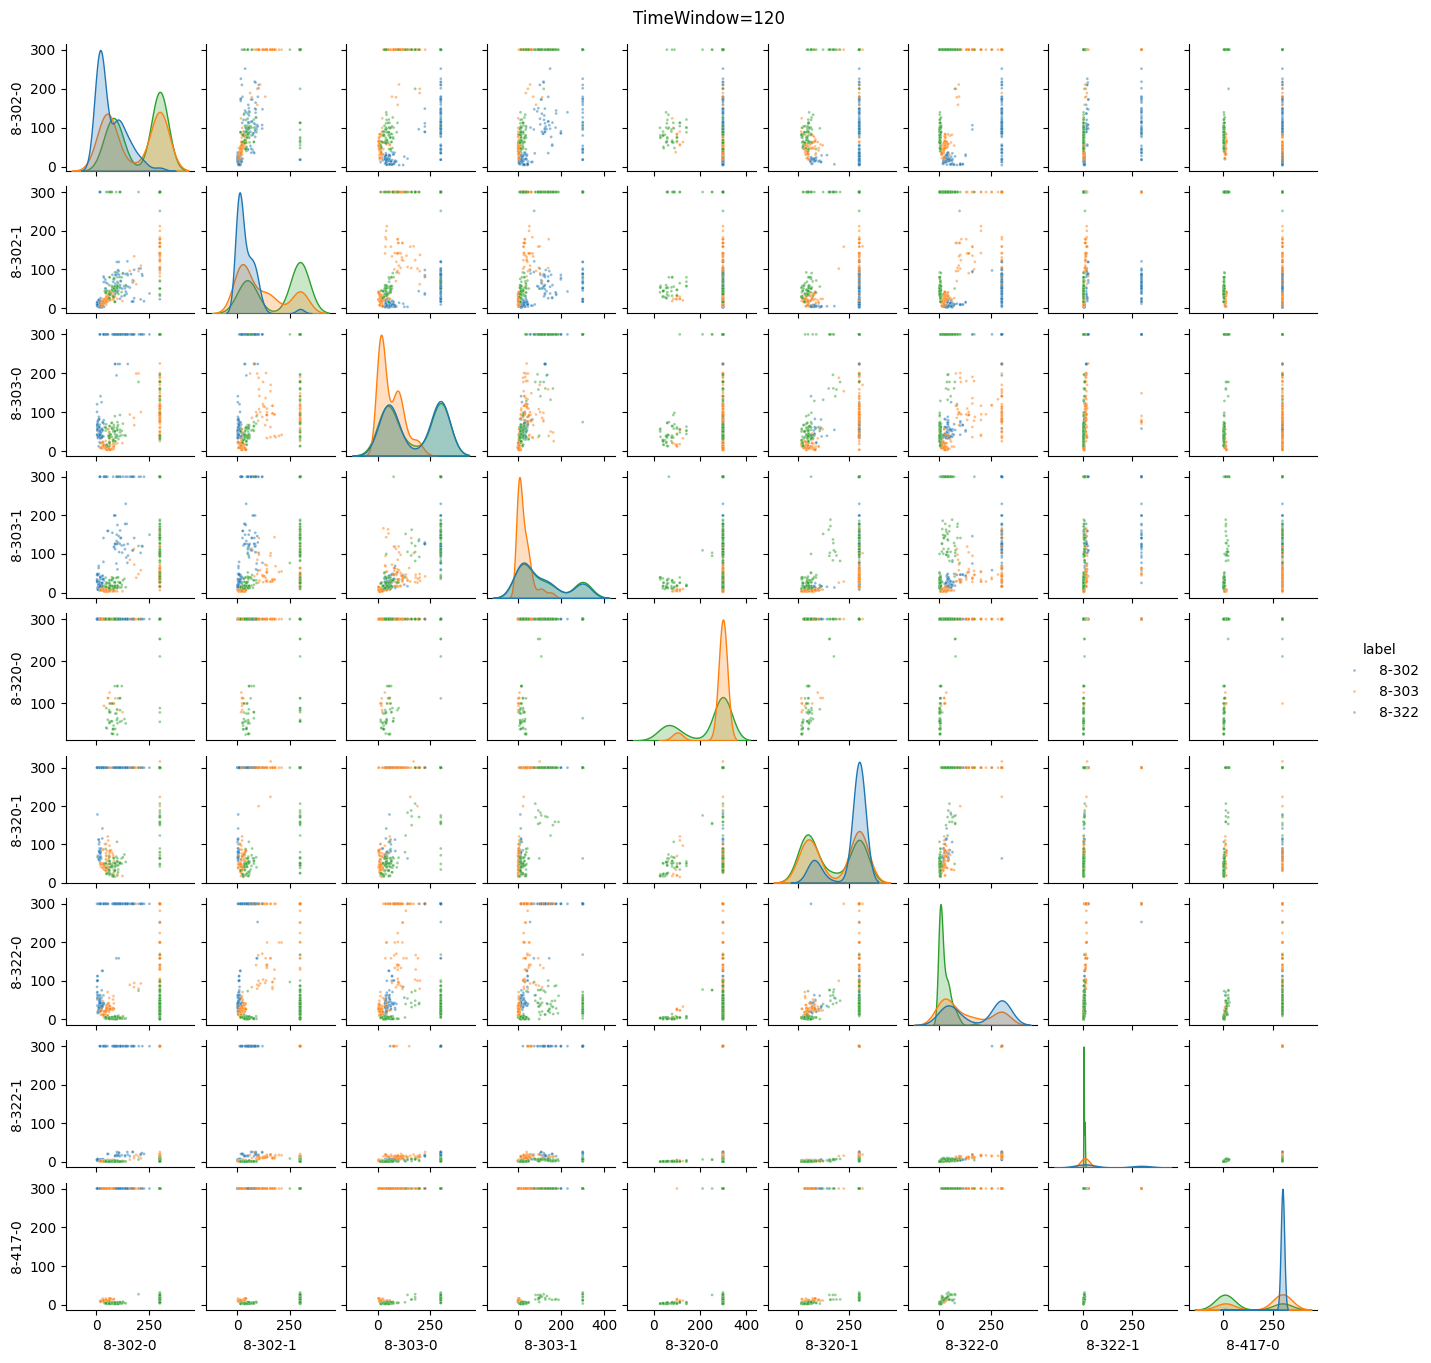

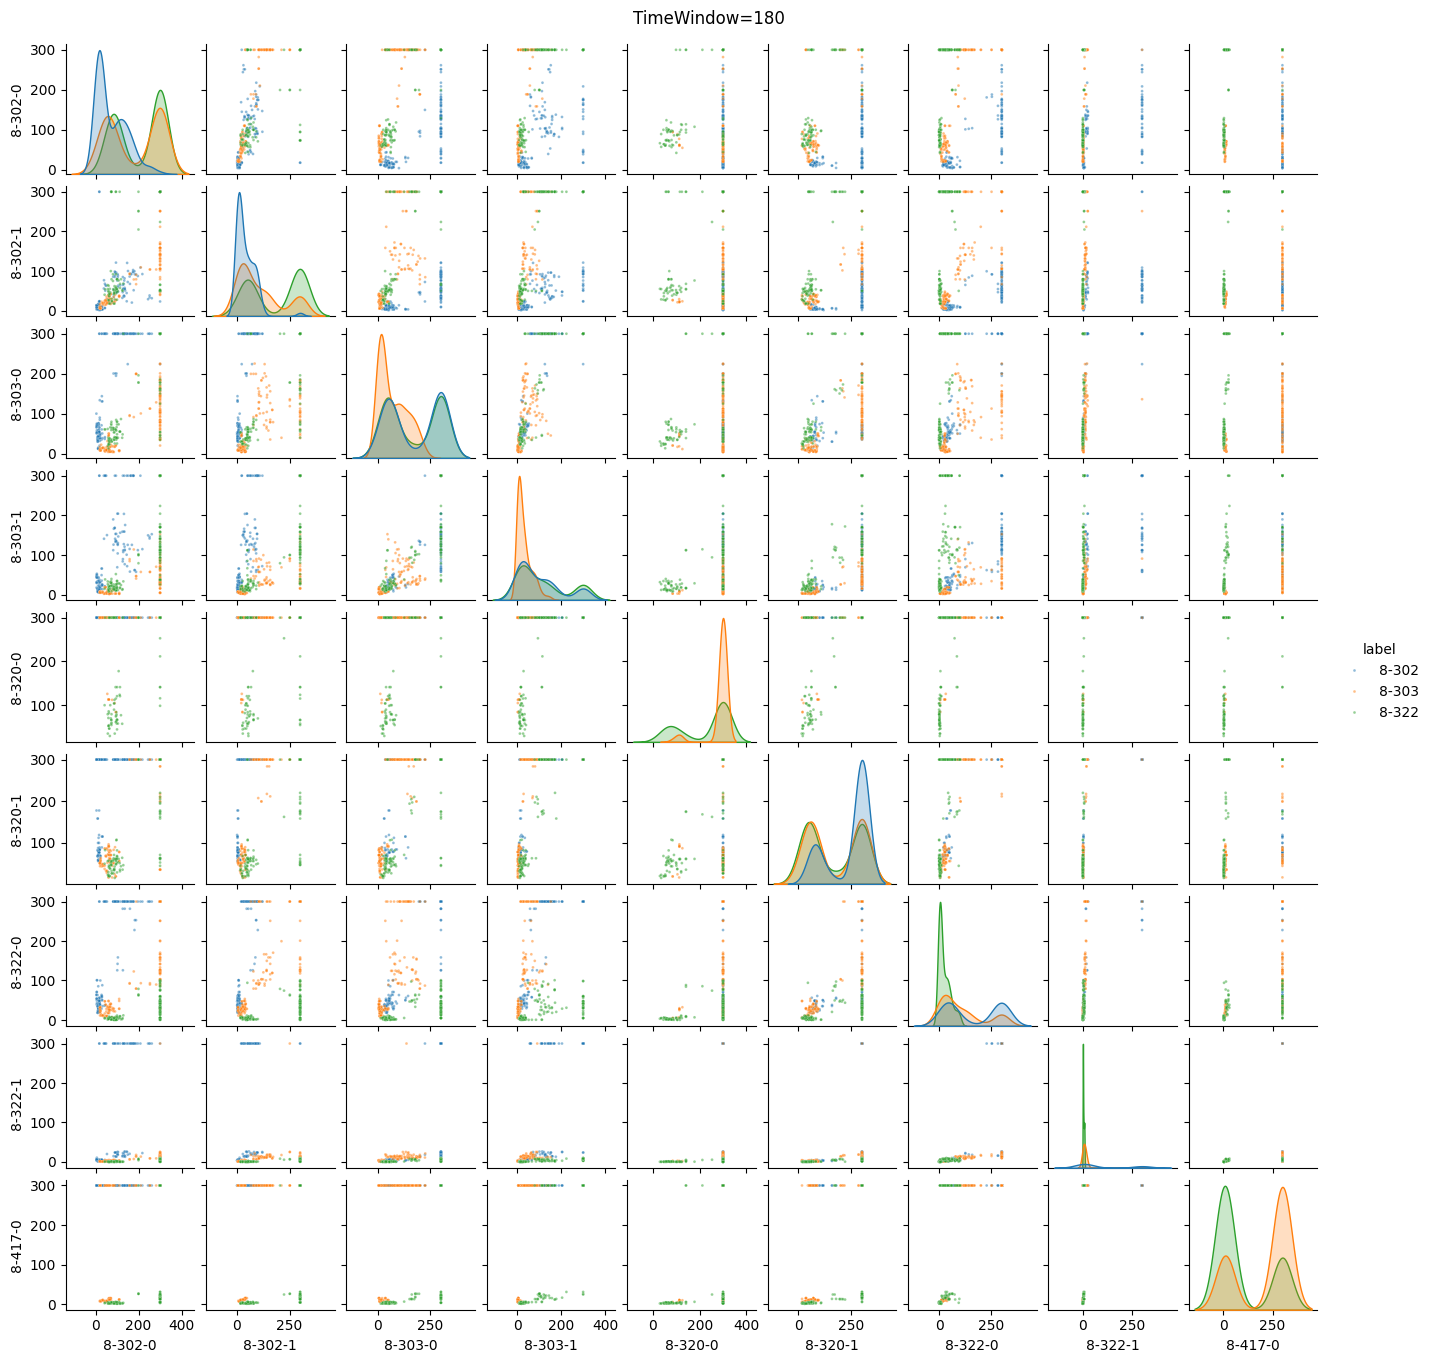

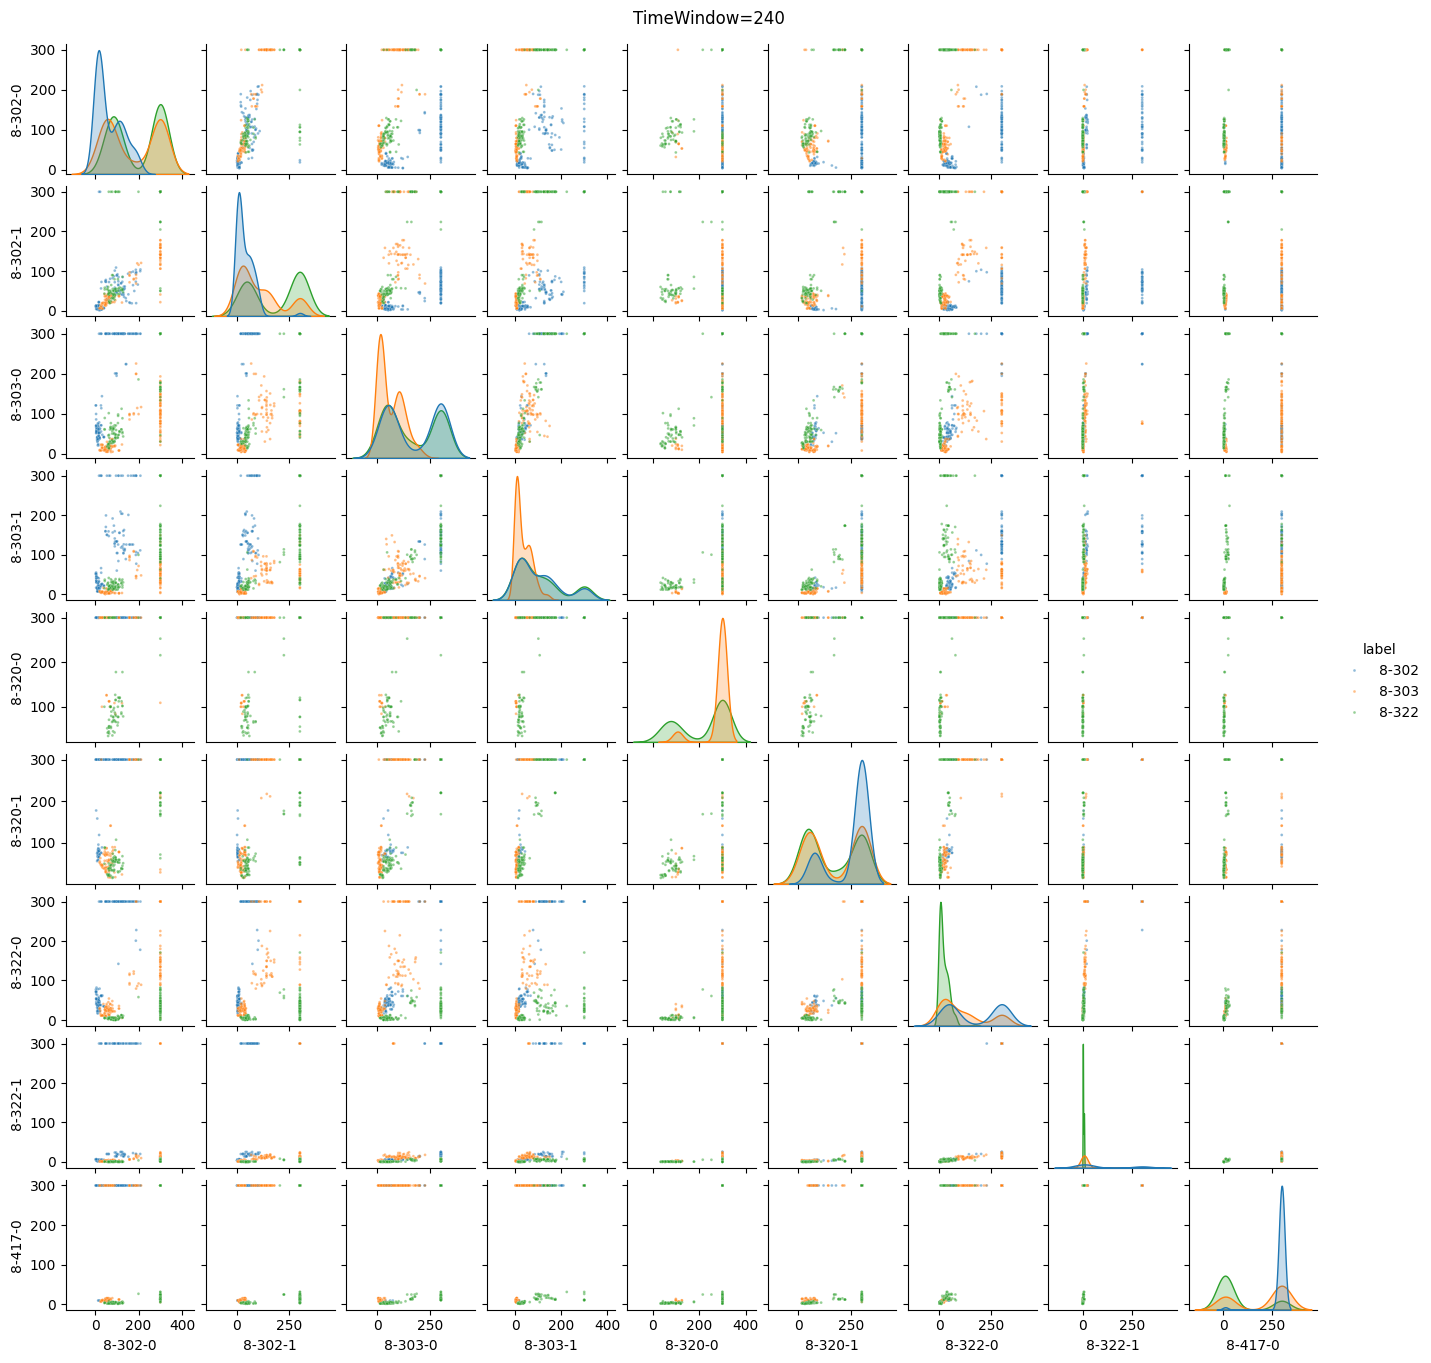

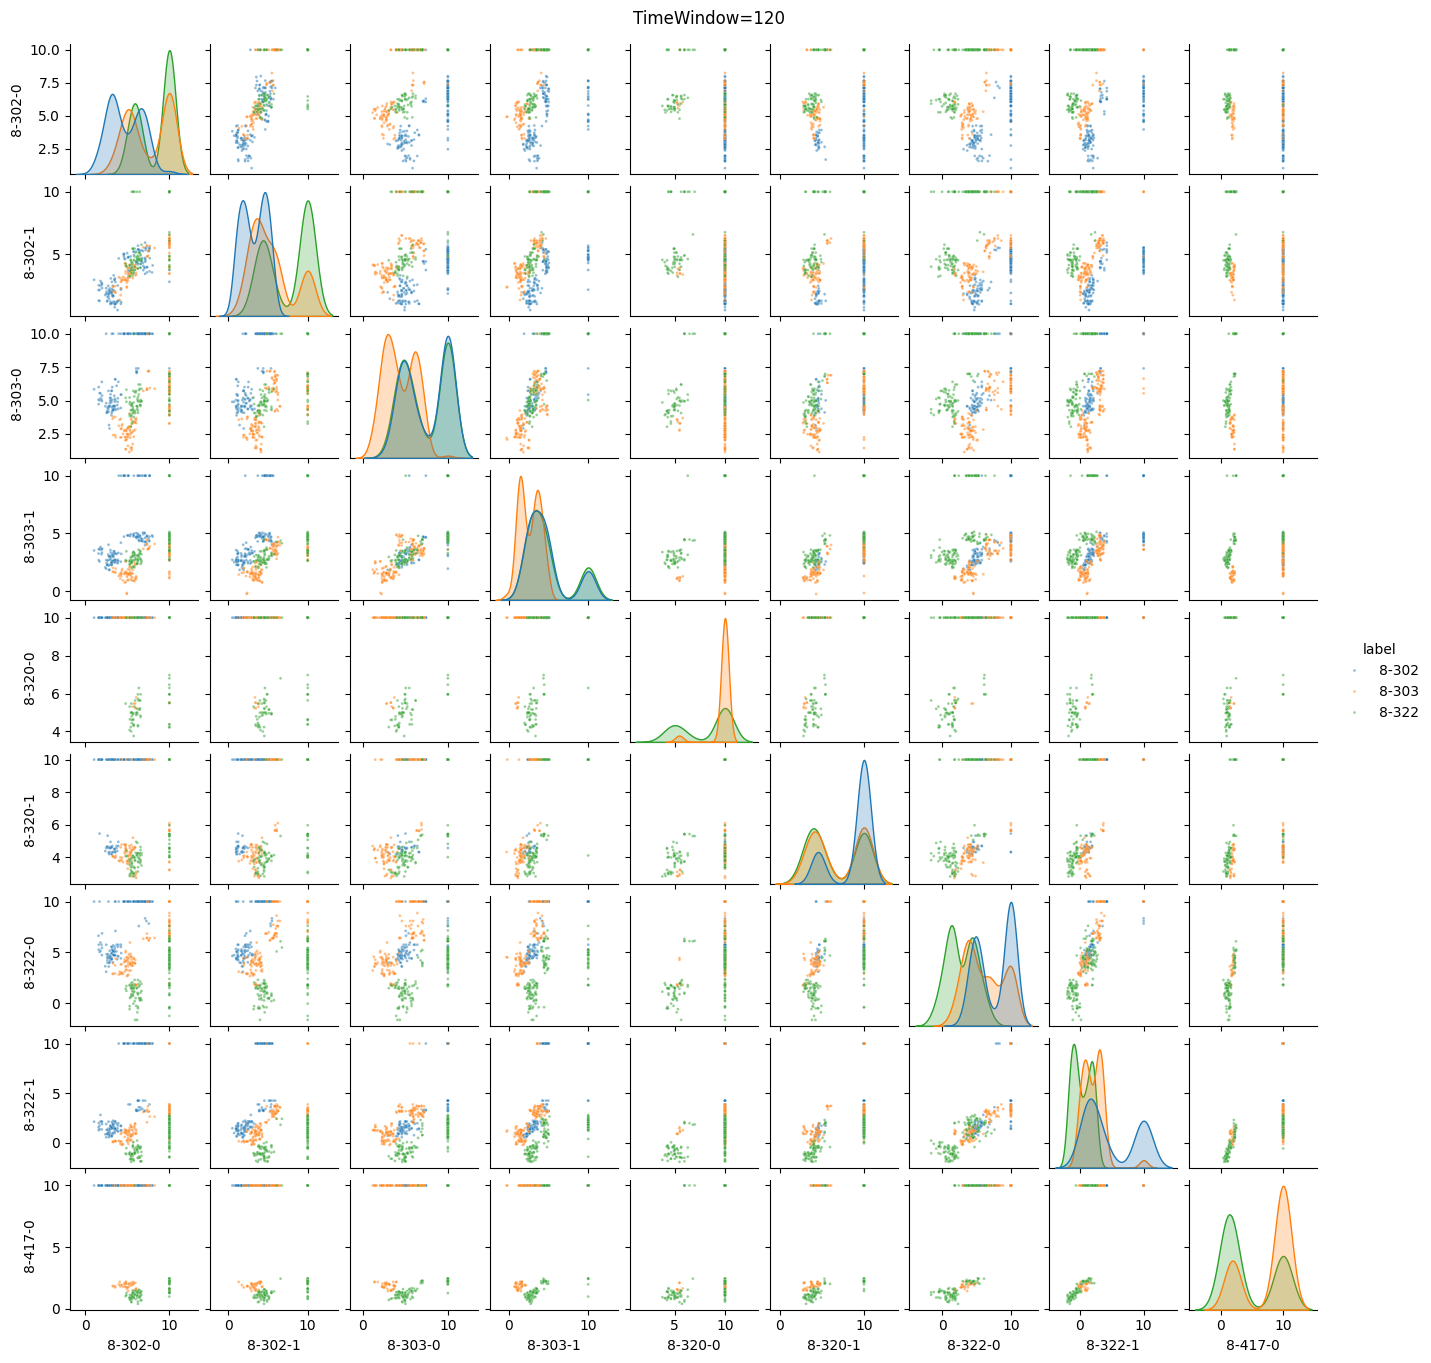

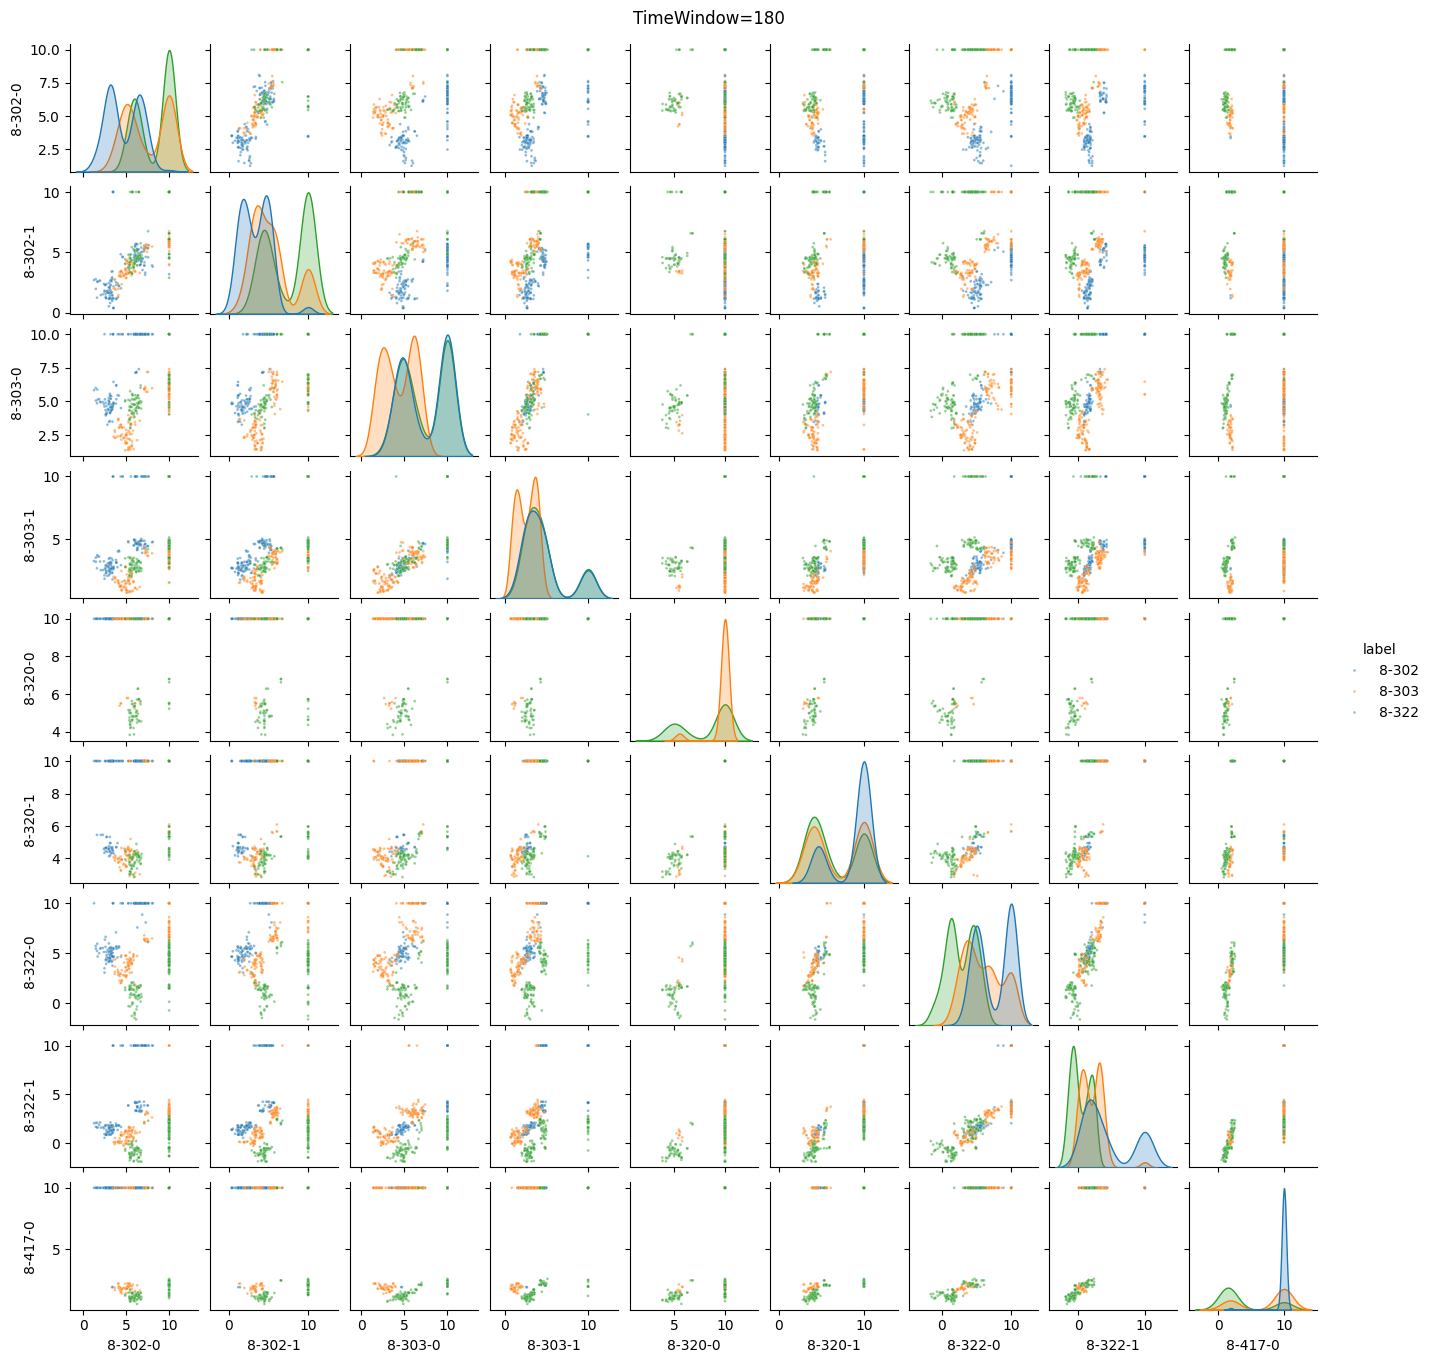

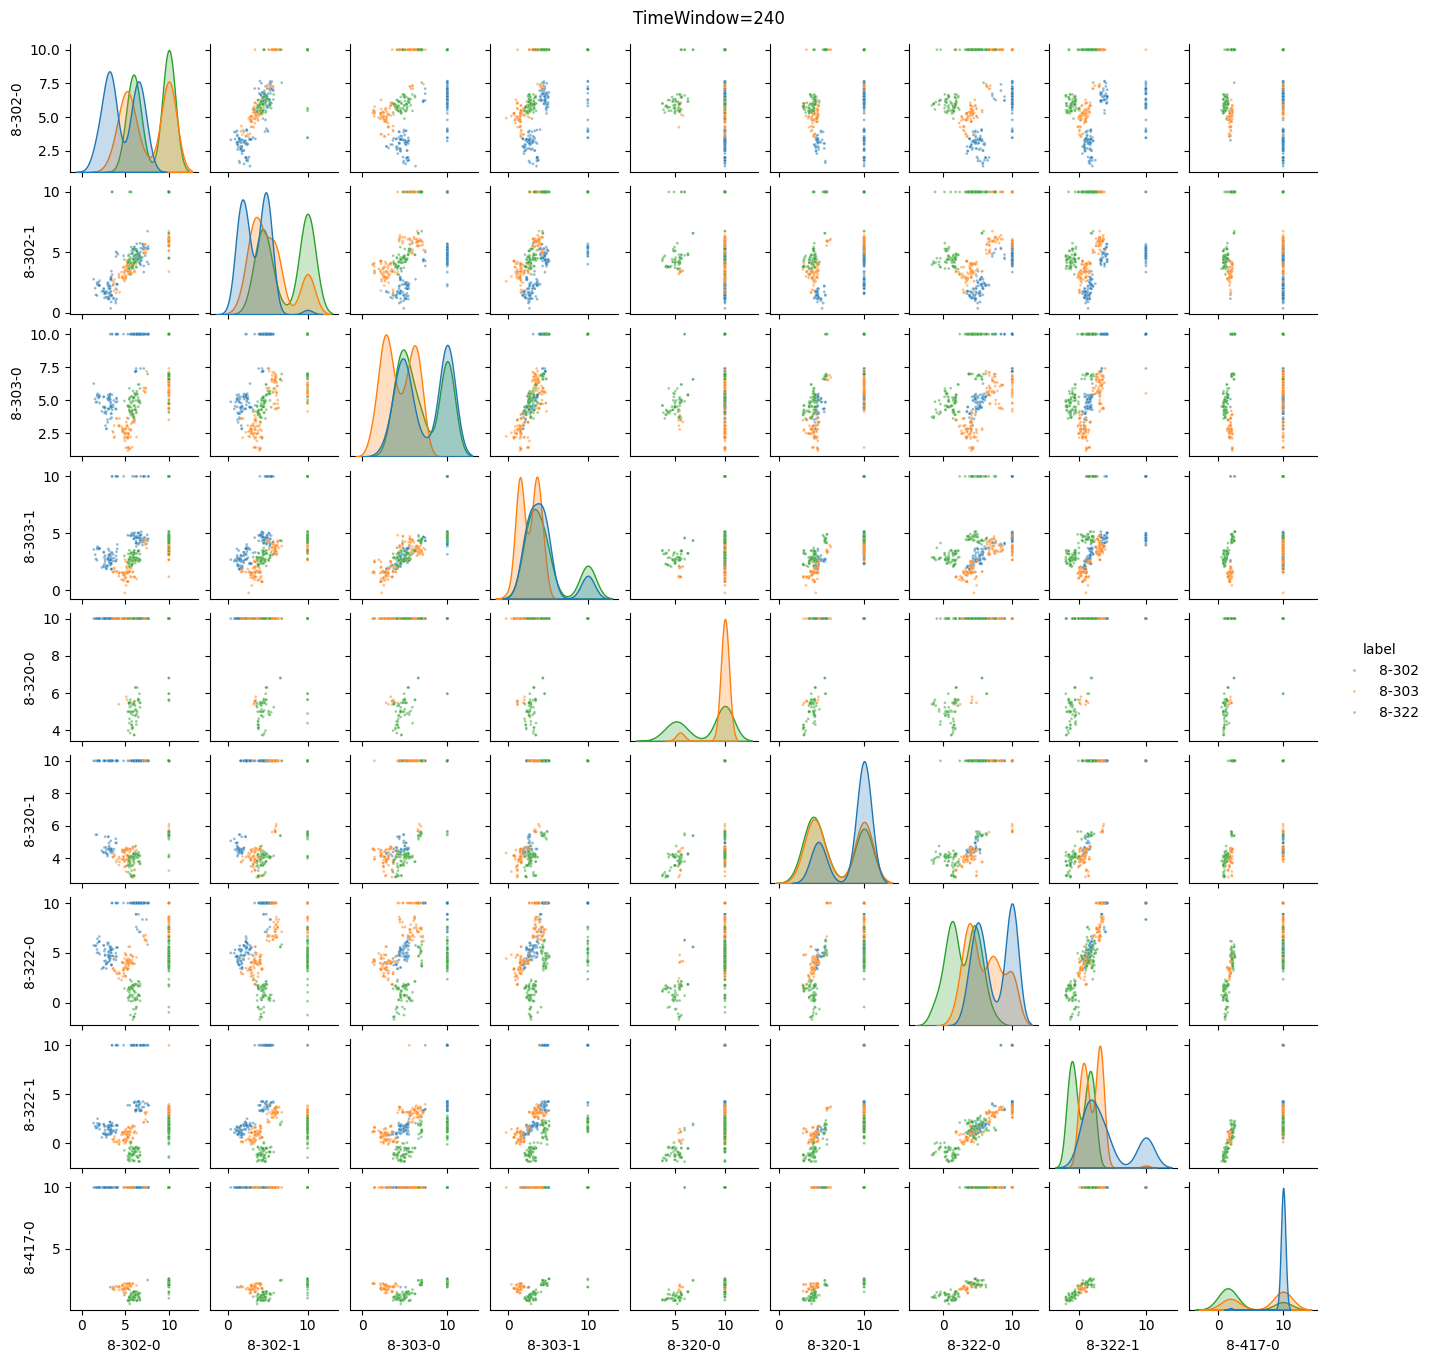

In [46]:
# PALETTE = {"8-302": "orange", "8-303": "deepskyblue", "8-322": "green"}
for directory in DIRECTORIES:
    for time_window in TIME_WINDOWS:
        # データの読み込み
        df = pd.read_csv(f"{directory}/t={time_window}.csv")
        df = df.groupby(["label", "ble_id"]).sample(n=N_SAMPLES)

        # 散布図行列のプロット
        df = df.drop(columns=["ble_id"])
        pg = sns.pairplot(df, hue="label", palette=sns.color_palette(n_colors=3), height=1.5, plot_kws={"s": 4, "alpha": 0.5})
        pg.figure.suptitle(f"TimeWindow={time_window}", y=1.01)

    

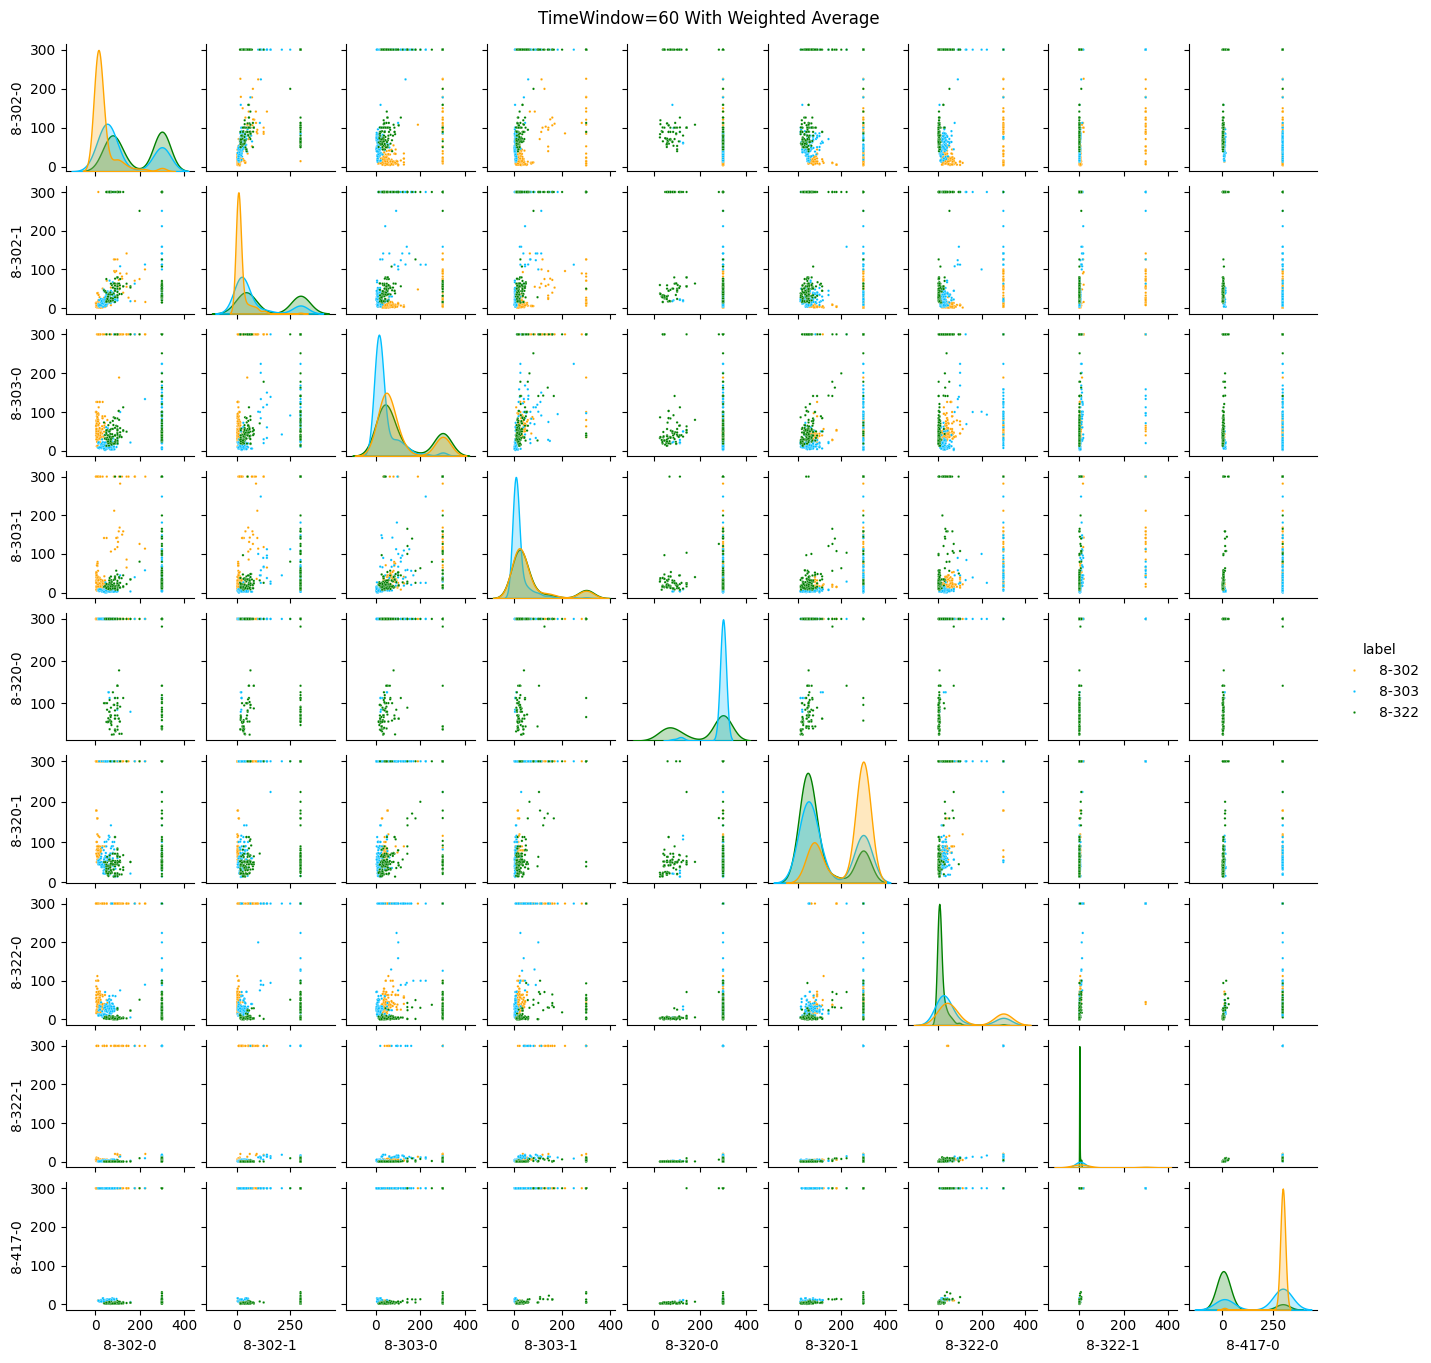

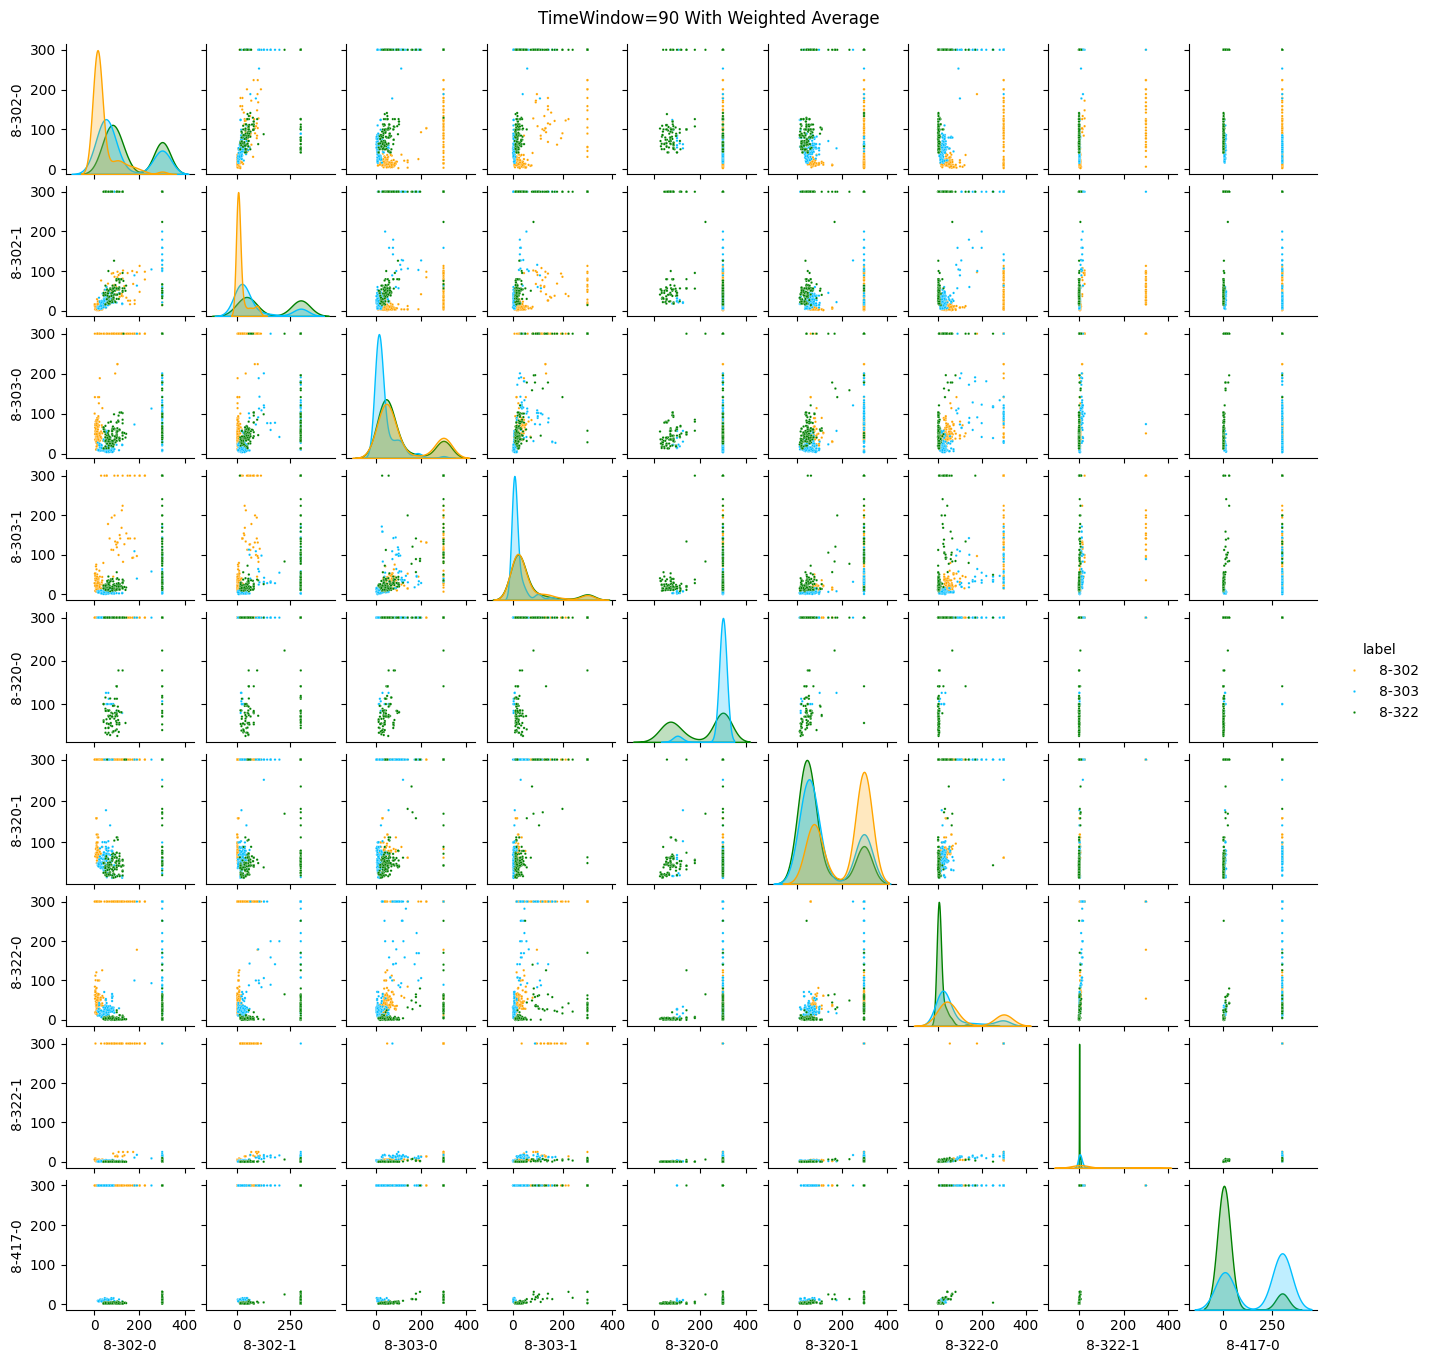

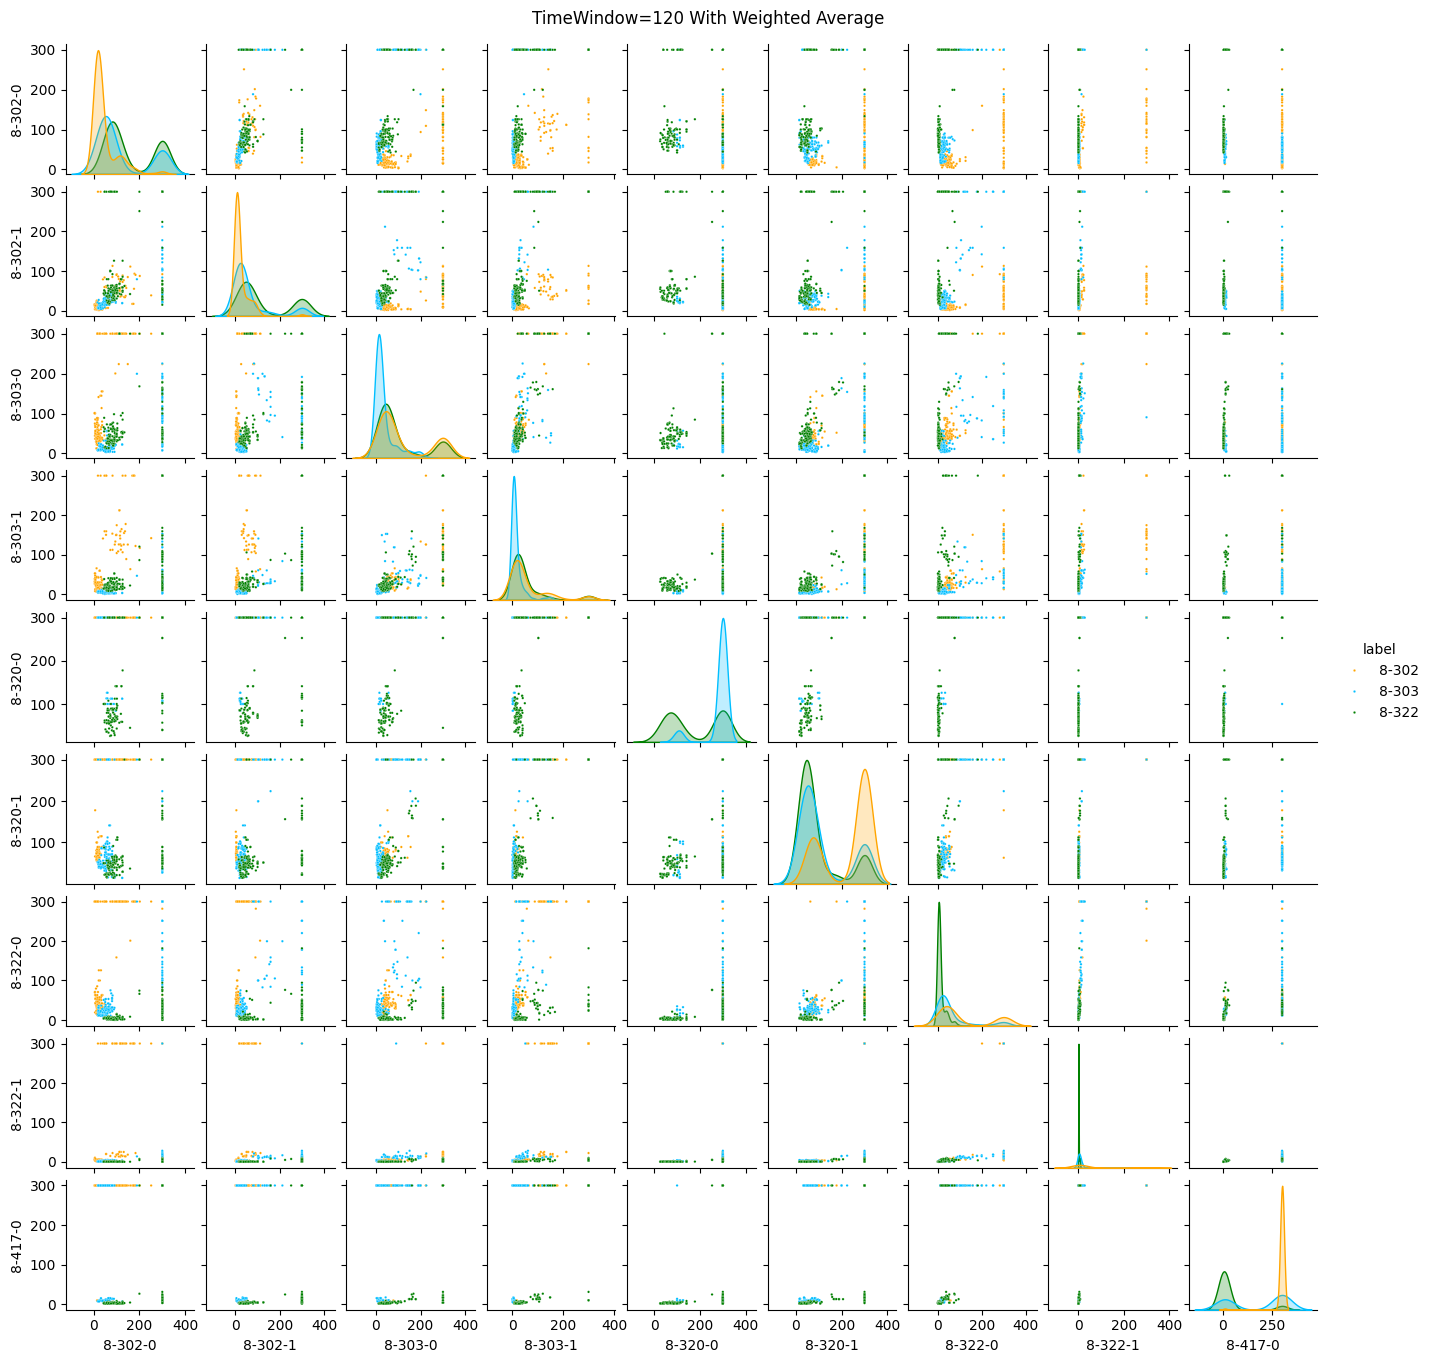

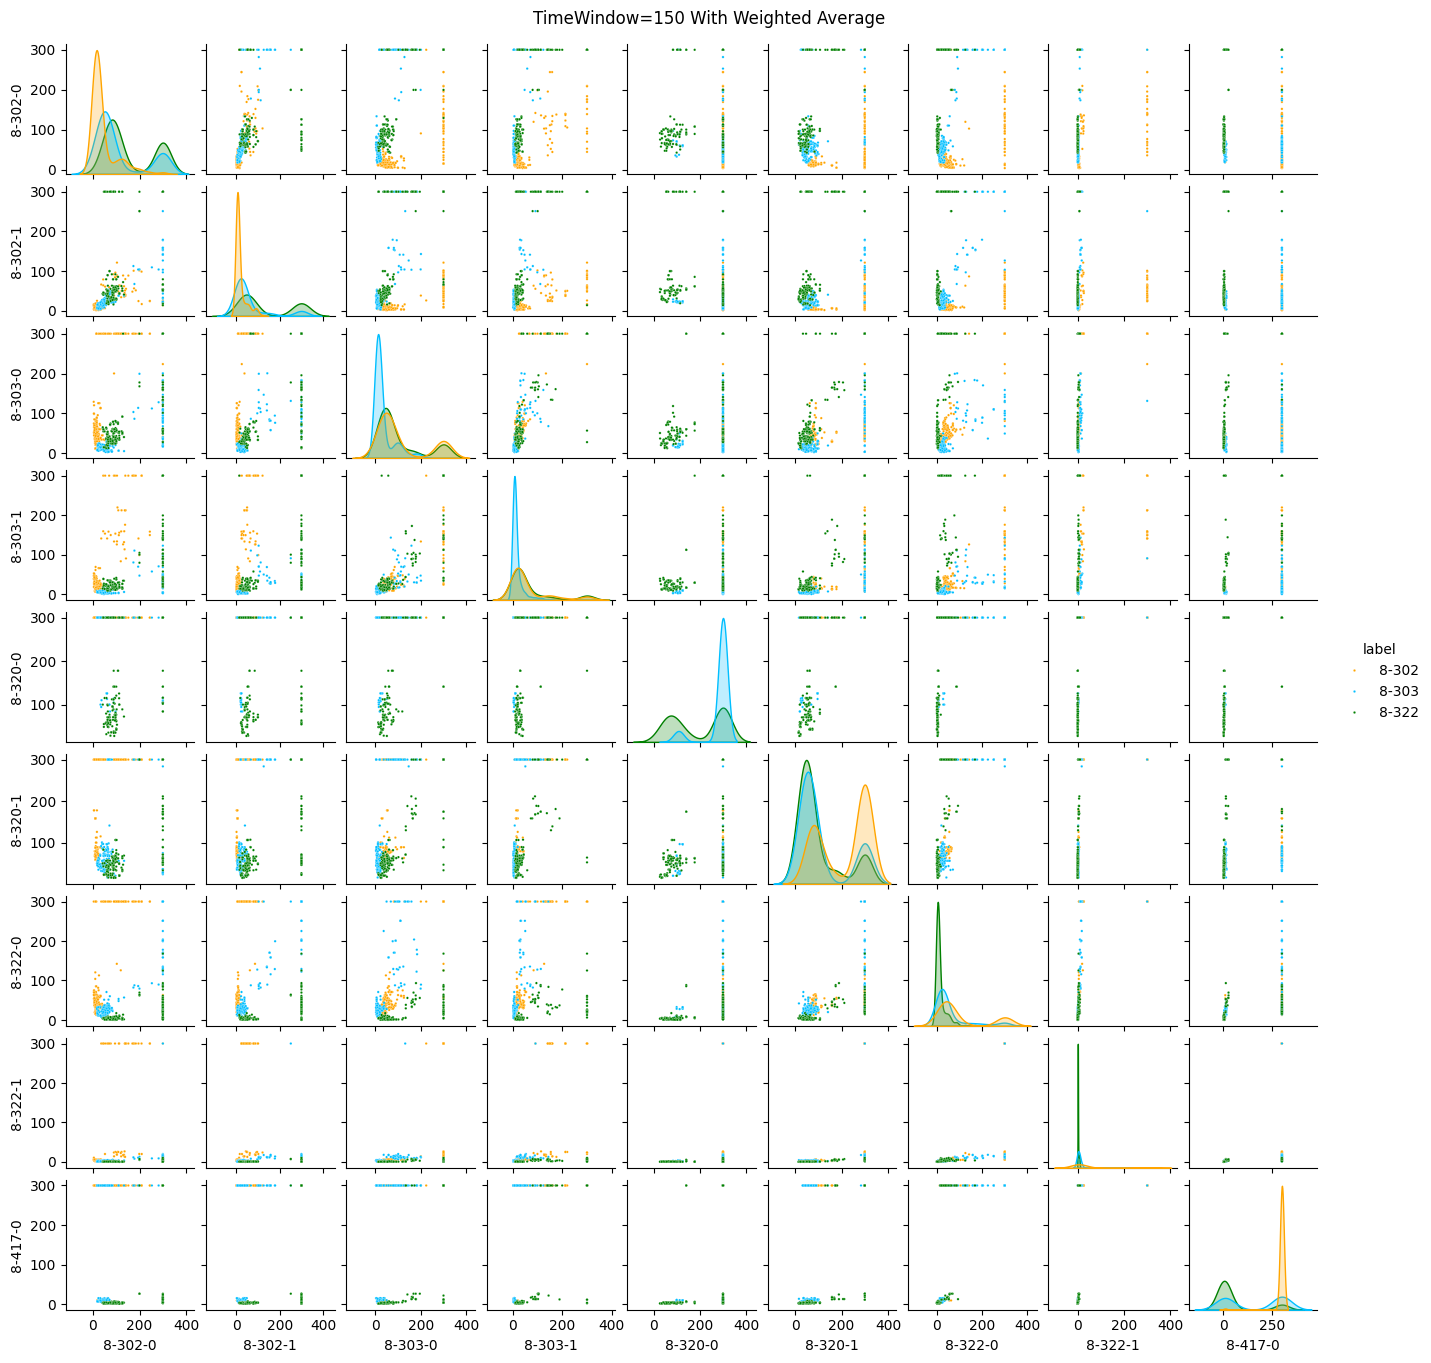

In [5]:
DIRECTORY = "../formatted"
N_SAMPLES = 200
TIME_WINDOWS = [60, 90, 120, 150]
PALETTE = {"8-302": "orange", "8-303": "deepskyblue", "8-322": "green"}

for time_window in TIME_WINDOWS:
    # データの読み込み
    df = pd.read_csv(f"{DIRECTORY}/t={time_window}.csv")

    # データをランダムにサンプリング
    df = df.groupby("label").sample(n=N_SAMPLES).reset_index(drop=True)

    # 散布図行列のプロット
    pg = sns.pairplot(df, hue="label", palette=PALETTE, height=1.5, plot_kws={"s": 3})
    pg.figure.suptitle(f"TimeWindow={time_window} With Weighted Average", y=1.01)
